In [ ]:
# pip install scikit-learn scipy

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt  

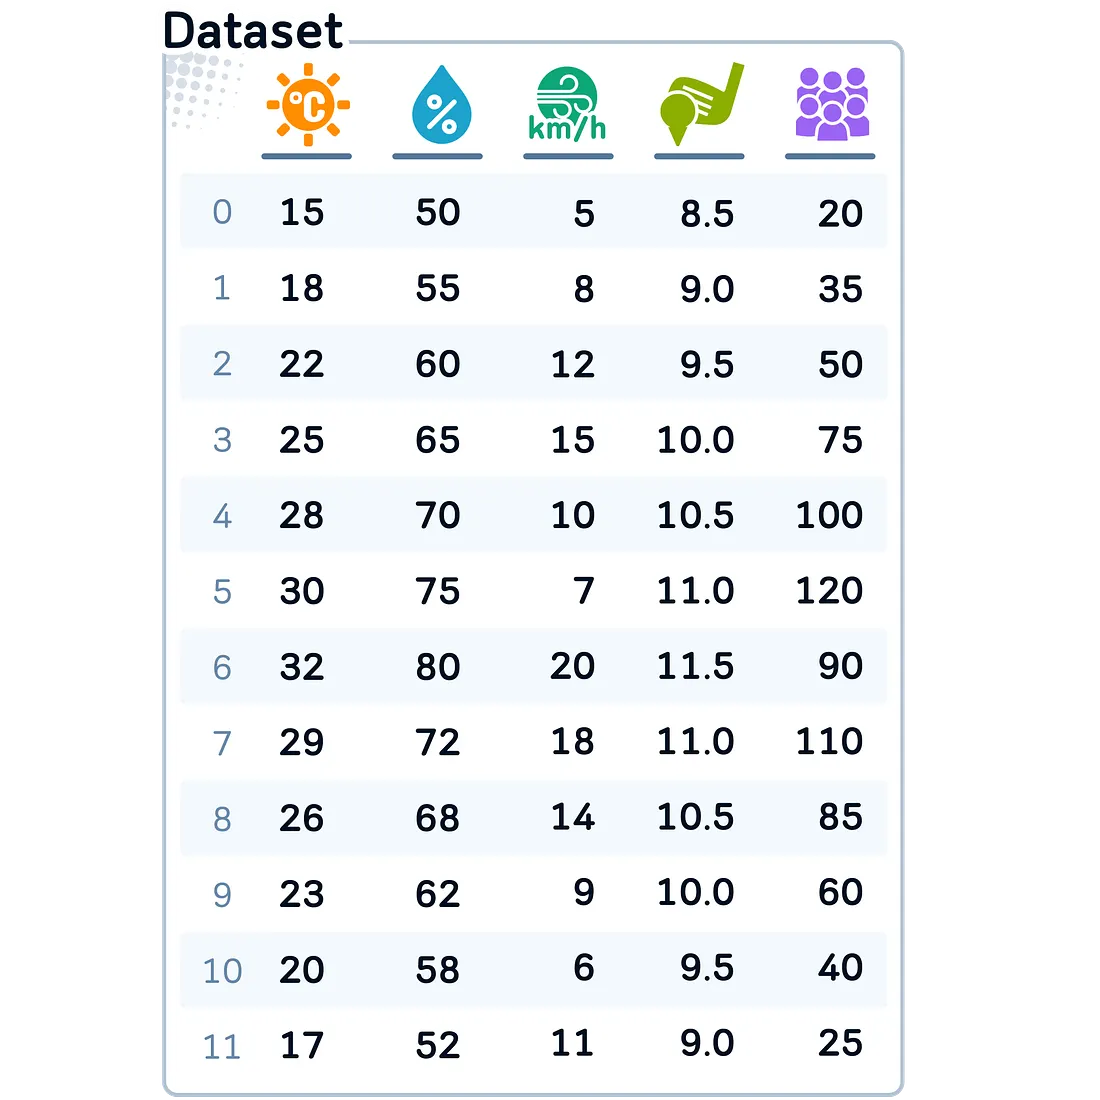

In [2]:
data = {
    'Temperature_Celsius': [15, 18, 22, 25, 28, 30, 32, 29, 26, 23, 20, 17],
    'Humidity_Percent': [50, 55, 60, 65, 70, 75, 80, 72, 68, 62, 58, 52],
    'Wind_Speed_kmh': [5, 8, 12, 15, 10, 7, 20, 18, 14, 9, 6, 11],
    'Golfers_Count': [20, 35, 50, 75, 100, 120, 90, 110, 85, 60, 40, 25],
    'Green_Speed': [8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 11.0, 10.5, 10.0, 9.5, 9.0]
}

df = pd.DataFrame(data)

# Min-Max Scaling 

- Масштабирование Min Max преобразует все значения в фиксированный диапазон, обычно от 0 до 1, путем вычитания минимального значения и деления на диапазон
- Мы применяем это к температуре, потому что в контексте гольфа температура имеет естественный минимум и максимум. Это позволяет сохранить относительные различия между температурами, где 0 - самый холодный день, 1 - самый жаркий, а 0,5 - день со средней температурой.

<Axes: xlabel='Temperature_Celsius', ylabel='Count'>

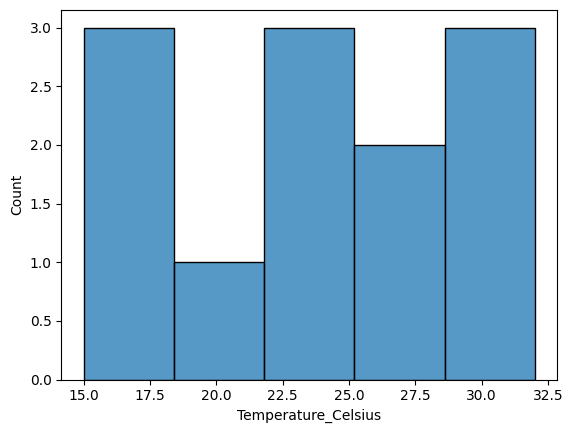

In [3]:
sns.histplot(df['Temperature_Celsius'])

In [4]:
min_max_scaler = MinMaxScaler()
df['Temperature_MinMax'] = min_max_scaler.fit_transform(df[['Temperature_Celsius']])

<Axes: xlabel='Temperature_MinMax', ylabel='Count'>

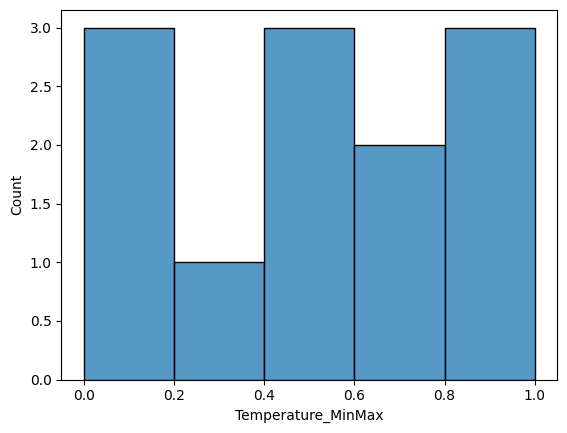

In [5]:
sns.histplot(df['Temperature_MinMax'])

In [6]:
df["Temperature_MinMax"].describe()

count    12.000000
mean      0.514706
std       0.323286
min       0.000000
25%       0.264706
50%       0.529412
75%       0.779412
max       1.000000
Name: Temperature_MinMax, dtype: float64

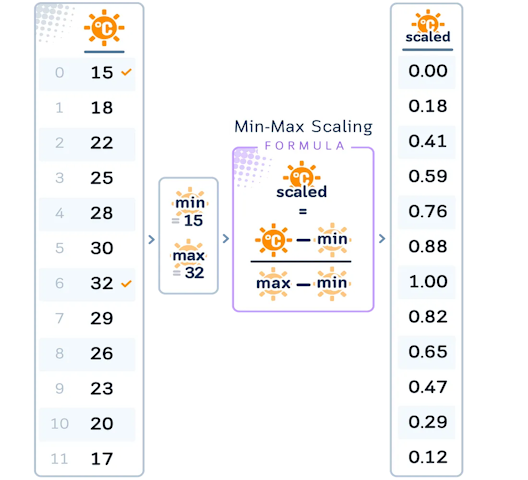

In [7]:
df.head()

,Temperature_Celsius,Humidity_Percent,Wind_Speed_kmh,Golfers_Count,Green_Speed,Temperature_MinMax
0,15,50,5,20,8.5,0.000000
1,18,55,8,35,9.0,0.176471
2,22,60,12,50,9.5,0.411765
3,25,65,15,75,10.0,0.588235
4,28,70,10,100,10.5,0.764706


# Standard Scaling

- Стандартное масштабирование центрирует данные вокруг среднего значения 0 и масштабирует их до стандартного отклонения 1, что достигается путем вычитания среднего значения и деления на стандартное отклонение. 
- Мы используем это для скорости ветра, потому что скорость ветра часто следует примерно нормальному распределению. Это позволяет нам легко определять исключительно спокойные или ветреные дни по тому, на сколько стандартных отклонений они отличаются от среднего значения.

<Axes: xlabel='Wind_Speed_kmh', ylabel='Count'>

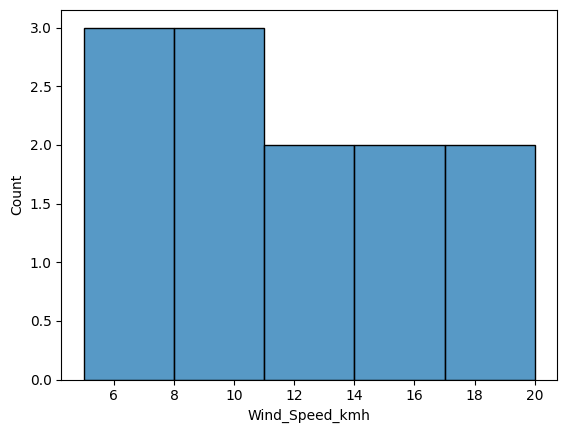

In [8]:
sns.histplot(df["Wind_Speed_kmh"])

In [9]:
std_scaler = StandardScaler()
df['Wind_Speed_Standardized'] = std_scaler.fit_transform(df[['Wind_Speed_kmh']])

<Axes: xlabel='Wind_Speed_Standardized', ylabel='Count'>

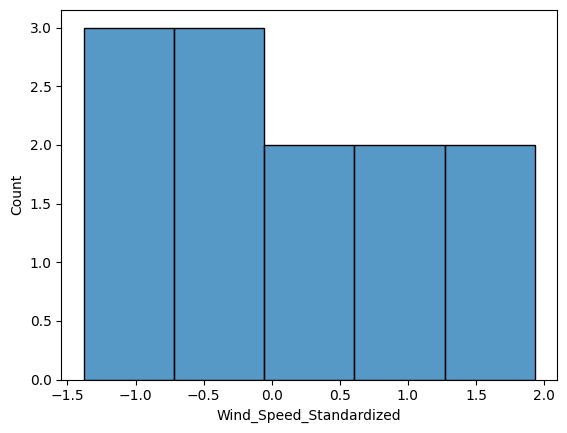

In [10]:
sns.histplot(df["Wind_Speed_Standardized"])

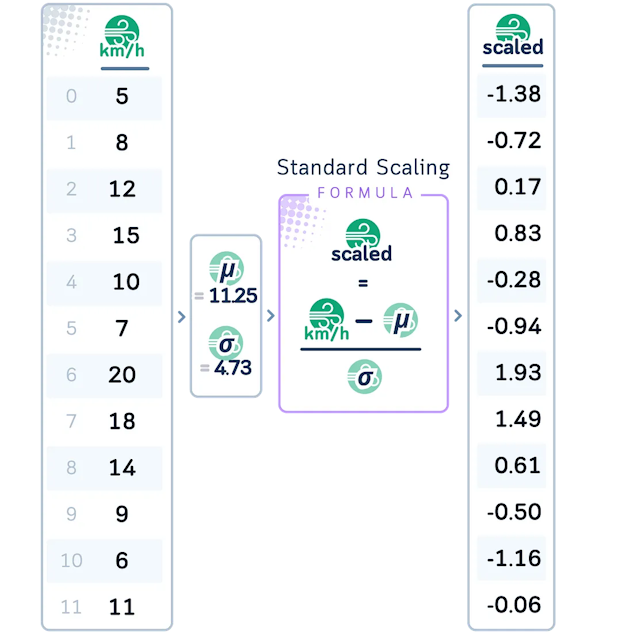

In [11]:
df["Wind_Speed_kmh"].mean()

np.float64(11.25)

In [12]:
print(df["Wind_Speed_Standardized"].mean())

3.469446951953614e-18


# Robust Scaling

- Robust Scaling сосредотачивает данные вокруг медианы и масштабирует с использованием межквартильного размаха (IQR).
- Мы применяем это к влажности, поскольку показания влажности могут иметь выбросы из-за экстремальных погодных условий или ошибок измерения. Это масштабирование гарантирует, что наши измерения менее чувствительны к этим выбросам.

<Axes: xlabel='Humidity_Percent', ylabel='Count'>

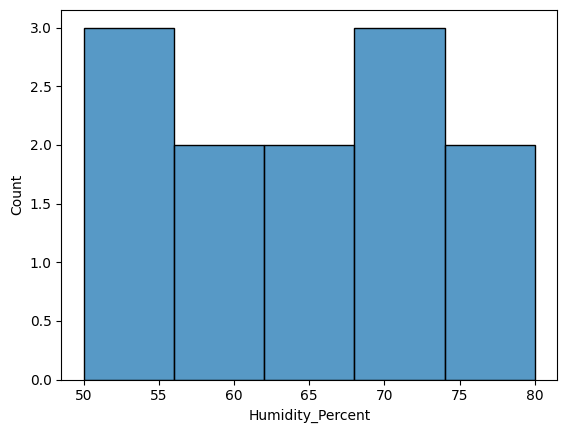

In [13]:
sns.histplot(df["Humidity_Percent"])

In [14]:
robust_scaler = RobustScaler()
df['Humidity_Robust'] = robust_scaler.fit_transform(df[['Humidity_Percent']])

<Axes: xlabel='Humidity_Robust', ylabel='Count'>

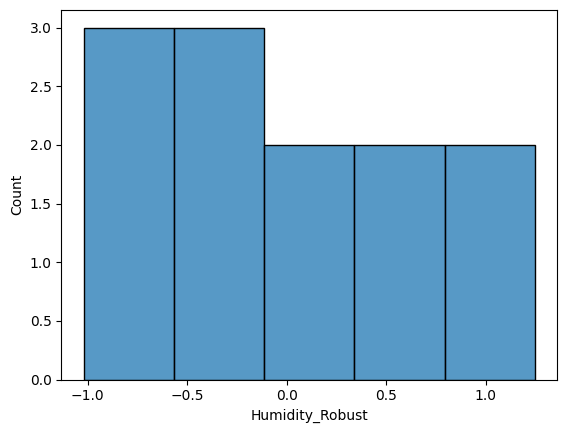

In [15]:
sns.histplot(df["Humidity_Robust"])

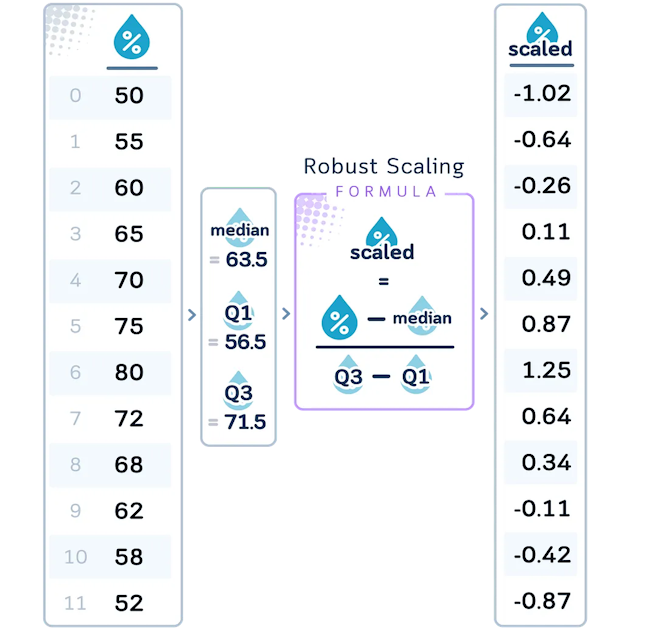

In [17]:
df.head(10)

,Temperature_Celsius,Humidity_Percent,Wind_Speed_kmh,Golfers_Count,Green_Speed,Temperature_MinMax,Wind_Speed_Standardized,Humidity_Robust
0,15,50,5,20,8.5,0.000000,-1.379693,-1.018868
1,18,55,8,35,9.0,0.176471,-0.717440,-0.641509
2,22,60,12,50,9.5,0.411765,0.165563,-0.264151
3,25,65,15,75,10.0,0.588235,0.827816,0.113208
4,28,70,10,100,10.5,0.764706,-0.275939,0.490566
5,30,75,7,120,11.0,0.882353,-0.938191,0.867925
6,32,80,20,90,11.5,1.000000,1.931570,1.245283
7,29,72,18,110,11.0,0.823529,1.490069,0.641509
8,26,68,14,85,10.5,0.647059,0.607065,0.339623
9,23,62,9,60,10.0,0.470588,-0.496690,-0.113208


# Log Transformation

- Применяет логарифмическую функцию к данным, сжимая шкалу очень больших значений.
- Мы используем это для Golfers Count, потому что данные подсчета часто следуют правостороннему асимметричному распределению. Это делает разницу между 10 и 20 игроками в гольф более значимой, чем между 100 и 110, что соответствует реальному влиянию этих различий

<Axes: xlabel='Golfers_Count', ylabel='Count'>

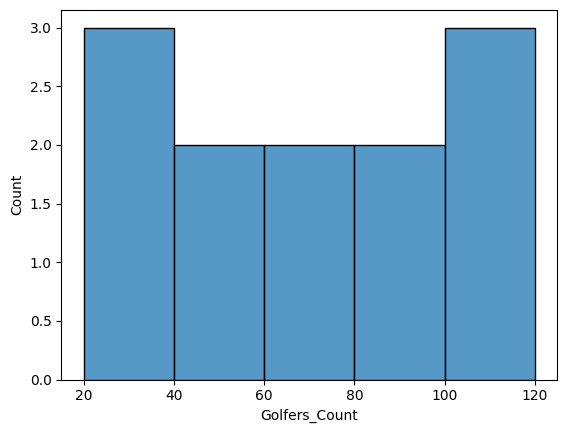

In [18]:
sns.histplot(df["Golfers_Count"])

In [19]:
df['Golfers_Log'] = np.log1p(df['Golfers_Count'])

<Axes: xlabel='Golfers_Log', ylabel='Count'>

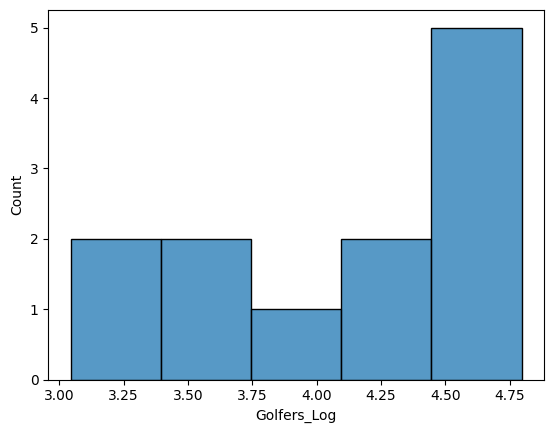

In [20]:
sns.histplot(df["Golfers_Log"])

In [21]:
df.head(10)

,Temperature_Celsius,Humidity_Percent,Wind_Speed_kmh,Golfers_Count,Green_Speed,Temperature_MinMax,Wind_Speed_Standardized,Humidity_Robust,Golfers_Log
0,15,50,5,20,8.5,0.000000,-1.379693,-1.018868,3.044522
1,18,55,8,35,9.0,0.176471,-0.717440,-0.641509,3.583519
2,22,60,12,50,9.5,0.411765,0.165563,-0.264151,3.931826
3,25,65,15,75,10.0,0.588235,0.827816,0.113208,4.330733
4,28,70,10,100,10.5,0.764706,-0.275939,0.490566,4.615121
5,30,75,7,120,11.0,0.882353,-0.938191,0.867925,4.795791
6,32,80,20,90,11.5,1.000000,1.931570,1.245283,4.510860
7,29,72,18,110,11.0,0.823529,1.490069,0.641509,4.709530
8,26,68,14,85,10.5,0.647059,0.607065,0.339623,4.454347
9,23,62,9,60,10.0,0.470588,-0.496690,-0.113208,4.110874


# Box-Cox Transformation

- Это семейство степенных преобразований (включающее логарифмическое преобразование как частный случай), цель которого - нормализовать распределение данных путем применения степенного преобразования с параметром лямбда (λ), оптимизированным для достижения желаемой нормальности.
- Мы применяем это к Green Speed, поскольку он может иметь сложное распределение, которое нелегко нормализовать с помощью более простых методов. Это позволяет данным направлять нас к наиболее подходящему преобразованию, потенциально улучшая его взаимосвязь с другими переменными.

In [24]:
df['Green_Speed_BoxCox'], lambda_param = stats.boxcox(df['Green_Speed'])
print(lambda_param)

0.7900474068367501


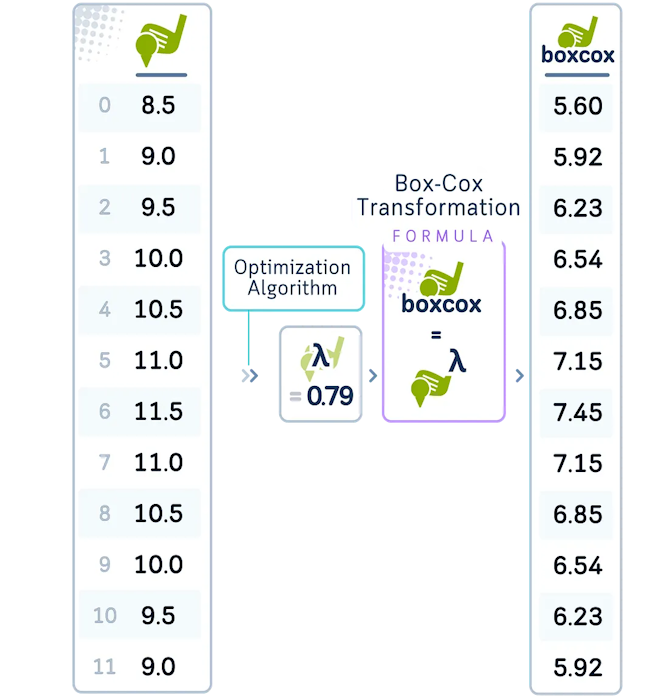

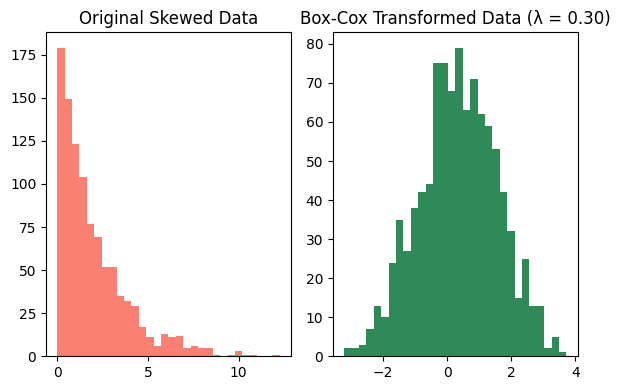

# Scaled data

In [25]:
df['Golfers_Count_Log'] = np.log1p(df['Golfers_Count']) 
df['Golfers_Count_Log_std'] = std_scaler.fit_transform(df[['Golfers_Count_Log']])

box_cox_transformer = PowerTransformer(method='box-cox') 
df['Green_Speed_BoxCox'] = box_cox_transformer.fit_transform(df[['Green_Speed']])

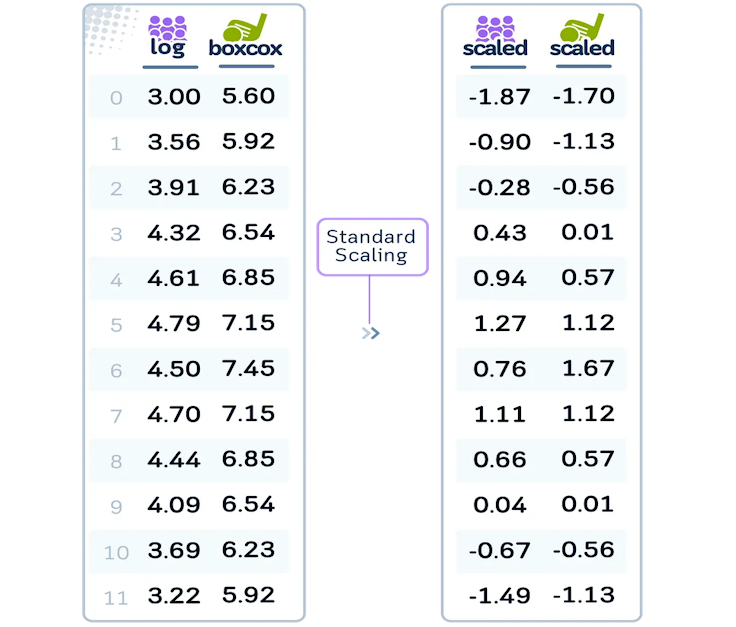

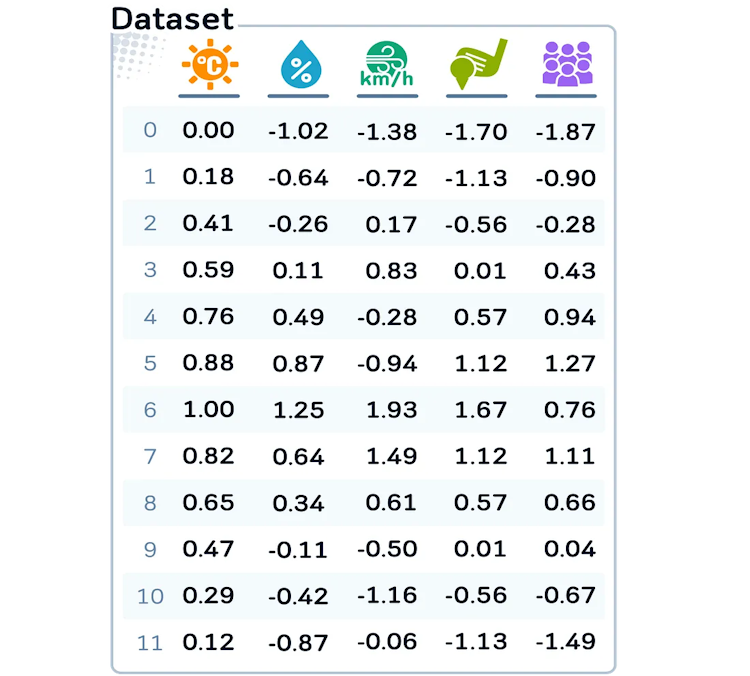

# Задача

1) **Выберите числовые признаки**
- Выберите **3 числовых признака** из любого датасета на Kaggle.
2) **Примените методы масштабирования**
Выполните масштабирование выбранных признаков с использованием методов масштабирования:
3) **Постройте графики «до / после»**
Для каждого из выбранных признаков:
- Постройте график **до** масштабирования  
- Постройте график **после** масштабирования  
Итого должно быть:
- 3 признака × 2 состояния = **6 графиков**
Типы графиков:
- гистограммы  
- boxplot  
- KDE-графики  
4) **Сравнить методы масштабирования**